# General functioning

Function get_insights(cube):
    Extracts and prints various characteristics of the data cube.
    Computes and prints time range, latitude/longitude range, total size, layer size, gap size, and value range.

Function get_gap_heat_map(cube):
    Generates a heat map of value counts (non-NaN values) for each latitude/longitude pixel.

In [1]:
from ml4xcube.cube_insights import get_insights
from ml4xcube.cube_insights import get_gap_heat_map
import xarray as xr
from xcube.core.store import new_data_store
import datetime
import matplotlib.pyplot as plt

In [4]:
# Replace it with any other data cube
variable = 'land_surface_temperature'
dimensions = {
    'times': (datetime.date(2003, 1, 1), datetime.date(2003, 12, 31))
}

data_store = new_data_store("s3", root="esdl-esdc-v2.1.1", storage_options=dict(anon=True))
dataset = data_store.open_data('esdc-8d-0.083deg-184x270x270-2.1.1.zarr')
ds = dataset[variable]
ds = ds.sel((datetime.date(2003, 1, 1), datetime.date(2003, 12, 31)))
path = "global_cube.zarr"

ds.to_zarr(path, mode="w")
ds = xr.open_zarr(path)[variable]

In [5]:
get_insights(ds)

The data cube has the following characteristics:
 
Variable:             Land Surface Temperature
Shape:                (time: 46, lat: 2160, lon: 4320)
Time range:           2003-01-05 - 2003-12-31
Latitude range:       -89.958° - 89.958°
Longitude range:      -179.958° - 179.958°
Total size:           429235200
Size of each layer:   9331200
Total gap size:       311557460 -> 73 %
Maximum gap size:     82 % on 2003-12-31
Minimum gap size:     66 % on 2003-03-10
Value range:          206.9 - 338.69


In [6]:
gap_count = get_gap_heat_map(ds)

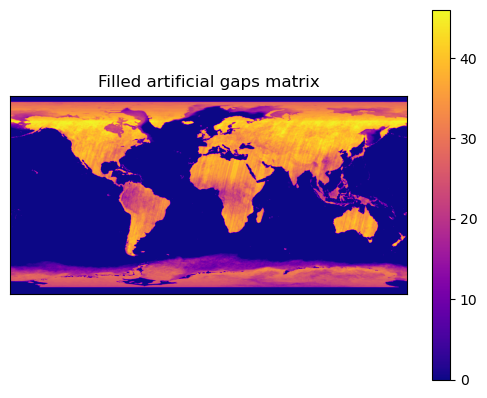

In [14]:
plt.imshow(gap_count, cmap="plasma")
plt.colorbar()
plt.title('Filled artificial gaps matrix')
plt.xticks([])
plt.yticks([])
plt.show()